![](lll.png)

Un des fléaux de nos économies modernes à l’échelle mondiale est l’endettement massif de pays qui se plongent dans des remboursements démentiels.
Ces données issues de la banque mondiale nous informe sur les différents types d’endettement avec des caractères précis et des indicateurs qui nous enseigne la nature de la dette. Ces données sont globales et regroupe de nombreux pays. Nous allons nous charger de nous intéresser aux politiques d’endettement des pays pour cela nous analyserons les points suivants :

Il faudra d’abord nettoyer les données.
Combien de pays concérnés?
Mieux comprendre les indicateurs de la dette
Quel pays est le plus endetté et dans quel secteur?
Quels indicateurs reviennent le plus souvent?
Quels sont les pays les plus endettés?
Quelle niveau de la dette pour les "pays riches"?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
debt=pd.read_csv("international_debt.csv")


# Nettoyage de données

In [ ]:
debt.head()

In [4]:
debt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 5 columns):
country_name      2357 non-null object
country_code      2357 non-null object
indicator_name    2357 non-null object
indicator_code    2357 non-null object
debt              2357 non-null float64
dtypes: float64(1), object(4)
memory usage: 92.2+ KB


In [5]:
debt.describe()

,debt
count,2.357000e+03
mean,1.306633e+09
std,5.226771e+09
min,0.000000e+00
25%,1.548248e+07
50%,1.073140e+08
75%,5.716575e+08
max,9.621862e+10


Combien de pays?

In [6]:
debt.isna().sum().sum()


0

In [7]:
debt['country_name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Central African Republic', 'Chad', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Djibouti', 'Dominica',
       'Dominican Republic', 'Georgia', 'Ecuador', 'Egypt, Arab Rep.',
       'El Salvador', 'Eritrea', 'Eswatini', 'Ethiopia', 'Fiji', 'Gabon',
       'Gambia, The', 'Ghana', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'IDA only',
       'India', 'Indonesia', 'Iran, Islamic Rep.', 'Jamaica', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kosovo', 'Kyrgyz Republic', 'Lao PDR',
       'Lesotho', 'Least developed countries: UN classification',
       'Lebanon', 'Liberia', 'Macedonia, FYR',

In [8]:
names = debt['country_name'].nunique()
names

124

Combien d'indicateurs?

In [9]:

debt['indicator_code'].unique()

array(['DT.DIS.DLXF.CD', 'DT.INT.DLXF.CD', 'DT.AMT.BLAT.CD',
       'DT.DIS.BLAT.CD', 'DT.INT.BLAT.CD', 'DT.AMT.MLAT.CD',
       'DT.DIS.MLAT.CD', 'DT.INT.MLAT.CD', 'DT.AMT.OFFT.CD',
       'DT.DIS.OFFT.CD', 'DT.INT.OFFT.CD', 'DT.AMT.DLXF.CD',
       'DT.INT.DPNG.CD', 'DT.AMT.PBND.CD', 'DT.INT.PBND.CD',
       'DT.AMT.PCBK.CD', 'DT.DIS.PCBK.CD', 'DT.INT.PCBK.CD',
       'DT.AMT.PROP.CD', 'DT.DIS.PROP.CD', 'DT.INT.PROP.CD',
       'DT.AMT.PRVT.CD', 'DT.DIS.PRVT.CD', 'DT.INT.PRVT.CD',
       'DT.AMT.DPNG.CD'], dtype=object)

# Que signifie ces codes?

In [10]:
indicator=debt.drop_duplicates(['indicator_code'])

In [11]:
indicator[['indicator_code','indicator_name']]

,indicator_code,indicator_name
0,DT.DIS.DLXF.CD,"Disbursements on external debt, long-term (DIS..."
1,DT.INT.DLXF.CD,"Interest payments on external debt, long-term ..."
2,DT.AMT.BLAT.CD,"PPG, bilateral (AMT, current US$)"
3,DT.DIS.BLAT.CD,"PPG, bilateral (DIS, current US$)"
4,DT.INT.BLAT.CD,"PPG, bilateral (INT, current US$)"
5,DT.AMT.MLAT.CD,"PPG, multilateral (AMT, current US$)"
6,DT.DIS.MLAT.CD,"PPG, multilateral (DIS, current US$)"
7,DT.INT.MLAT.CD,"PPG, multilateral (INT, current US$)"
8,DT.AMT.OFFT.CD,"PPG, official creditors (AMT, current US$)"
9,DT.DIS.OFFT.CD,"PPG, official creditors (DIS, current US$)"


Montant totale de la dette

In [ ]:
sums=debt["debt"].sum()
sums

In [13]:
(sums/100000,2)

(30797344.876758, 2)

# Quelle est la plus grande somme?

In [14]:
debt["debt"].max()

96218620835.7

Le pays le plus endéttés

In [15]:
top_1 = debt['debt'].nlargest(1)

In [16]:
debt[debt['debt'].isin(top_1)]
#Chine

,country_name,country_code,indicator_name,indicator_code,debt
462,China,CHN,"Principal repayments on external debt, long-te...",DT.AMT.DLXF.CD,9.621862e+10


# Quelle est la moyenne des indicateur de la dette? Quelle indicateur a la plus grande somme?

In [58]:
#Moyenne des sommes des indicateurs, savoir ceux dans quoi les pays depensent
means = debt.groupby('indicator_name')['debt'].mean().sort_values(ascending=False)
means
#Principal repayments on external debt, long-term (AMT, current US$)

indicator_name
Principal repayments on external debt, long-term (AMT, current US$)                      5.904868e+09
Principal repayments on external debt, private nonguaranteed (PNG) (AMT, current US$)    5.161194e+09
Disbursements on external debt, long-term (DIS, current US$)                             2.152041e+09
PPG, official creditors (DIS, current US$)                                               1.958983e+09
PPG, private creditors (AMT, current US$)                                                1.803694e+09
Interest payments on external debt, long-term (INT, current US$)                         1.644024e+09
PPG, bilateral (DIS, current US$)                                                        1.223139e+09
Interest payments on external debt, private nonguaranteed (PNG) (INT, current US$)       1.220411e+09
PPG, official creditors (AMT, current US$)                                               1.191188e+09
PPG, bonds (AMT, current US$)                                      

# Principal repayments on external debt, long-term (AMT, current US$) est l'indicateur avec la somme la pmlus élevée.
Quel est le montant pour la Chine?

In [18]:
debt[(debt['country_name'] == 'China')]


,country_name,country_code,indicator_name,indicator_code,debt
440,China,CHN,"Disbursements on external debt, long-term (DIS...",DT.DIS.DLXF.CD,1.569256e+10
441,China,CHN,"Interest payments on external debt, long-term ...",DT.INT.DLXF.CD,1.786655e+10
442,China,CHN,"Interest payments on external debt, private no...",DT.INT.DPNG.CD,1.414272e+10
443,China,CHN,"PPG, bilateral (AMT, current US$)",DT.AMT.BLAT.CD,6.532446e+09
444,China,CHN,"PPG, bilateral (INT, current US$)",DT.INT.BLAT.CD,5.148984e+08
445,China,CHN,"PPG, bonds (AMT, current US$)",DT.AMT.PBND.CD,9.834677e+09
446,China,CHN,"PPG, bonds (INT, current US$)",DT.INT.PBND.CD,1.224249e+09
447,China,CHN,"PPG, commercial banks (AMT, current US$)",DT.AMT.PCBK.CD,4.046243e+09
448,China,CHN,"PPG, commercial banks (DIS, current US$)",DT.DIS.PCBK.CD,3.777050e+09
449,China,CHN,"PPG, commercial banks (INT, current US$)",DT.INT.PCBK.CD,9.699331e+08


In [19]:
debt[(debt['country_name'] == 'China') & (debt['indicator_code'] == 'DT.DIS.DLXF.CD')] 

,country_name,country_code,indicator_name,indicator_code,debt
440,China,CHN,"Disbursements on external debt, long-term (DIS...",DT.DIS.DLXF.CD,1.569256e+10


Le remboursement sur la dette externe: Le plus grand client...

In [20]:
max_type=debt[(debt['indicator_code'] == 'DT.AMT.DLXF.CD')]
max_type

,country_name,country_code,indicator_name,indicator_code,debt
11,Afghanistan,AFG,"Principal repayments on external debt, long-te...",DT.AMT.DLXF.CD,1.008472e+08
35,Albania,ALB,"Principal repayments on external debt, long-te...",DT.AMT.DLXF.CD,7.902487e+08
54,Algeria,DZA,"Principal repayments on external debt, long-te...",DT.AMT.DLXF.CD,1.711852e+08
77,Angola,AGO,"Principal repayments on external debt, long-te...",DT.AMT.DLXF.CD,1.106705e+10
96,Armenia,ARM,"Principal repayments on external debt, long-te...",DT.AMT.DLXF.CD,8.456307e+08
...,...,...,...,...,...
2282,"Venezuela, RB",VEN,"Principal repayments on external debt, long-te...",DT.AMT.DLXF.CD,9.878659e+09
2304,Vietnam,VNM,"Principal repayments on external debt, long-te...",DT.AMT.DLXF.CD,8.873506e+09
2317,"Yemen, Rep.",YEM,"Principal repayments on external debt, long-te...",DT.AMT.DLXF.CD,3.708302e+08
2341,Zambia,ZMB,"Principal repayments on external debt, long-te...",DT.AMT.DLXF.CD,1.217643e+09


In [21]:
max_type['debt'].max()

96218620835.7

In [22]:
maxi = max_type.loc[max_type.groupby('country_name')['debt'].idxmax()]

In [63]:
top_1 = maxi['debt'].nlargest(1)
top_1

462    9.621862e+10
Name: debt, dtype: float64

In [64]:
maxi[maxi['debt'].isin(top_1)]

,country_name,country_code,indicator_name,indicator_code,debt
462,China,CHN,"Principal repayments on external debt, long-te...",DT.AMT.DLXF.CD,9.621862e+10


Quels indicateurs reviennent le plus?

In [25]:
#8. The most common debt indicator¶

debt.groupby('indicator_name')['country_name'].nunique()

indicator_name
Disbursements on external debt, long-term (DIS, current US$)                             123
Interest payments on external debt, long-term (INT, current US$)                         124
Interest payments on external debt, private nonguaranteed (PNG) (INT, current US$)        79
PPG, bilateral (AMT, current US$)                                                        122
PPG, bilateral (DIS, current US$)                                                        113
PPG, bilateral (INT, current US$)                                                        122
PPG, bonds (AMT, current US$)                                                             69
PPG, bonds (INT, current US$)                                                             69
PPG, commercial banks (AMT, current US$)                                                  84
PPG, commercial banks (DIS, current US$)                                                  51
PPG, commercial banks (INT, current US$)               

Les 10 pays les plus touchés

In [61]:
top_10 = debt.sort_values('debt', ascending=False).drop_duplicates('country_name').head(10)


In [27]:
top_10_clean=top_10.drop(columns=['country_code', 'indicator_name','indicator_code'])
top_10_clean

,country_name,debt
462,China,9.621862e+10
304,Brazil,9.004184e+10
1785,Russian Federation,6.658976e+10
2179,Turkey,5.155503e+10
1954,South Asia,4.875630e+10
1221,Least developed countries: UN classification,4.016077e+10
986,IDA only,3.453119e+10
1033,India,3.192351e+10
1058,Indonesia,3.091611e+10
1137,Kazakhstan,2.748209e+10


In [28]:
data_with_index = top_10_clean.set_index("country_name")
data_with_index

,debt
country_name,
China,9.621862e+10
Brazil,9.004184e+10
Russian Federation,6.658976e+10
Turkey,5.155503e+10
South Asia,4.875630e+10
Least developed countries: UN classification,4.016077e+10
IDA only,3.453119e+10
India,3.192351e+10
Indonesia,3.091611e+10


Représentation Graphique

Text(0, 0.5, 'Pays')

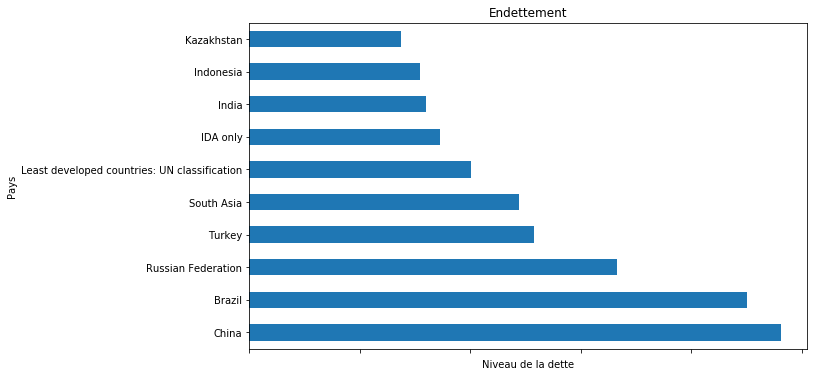

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
ax=data_with_index['debt'].sort_values(ascending=False).head(10).plot(kind='barh')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Endettement")
ax.set_xlabel("Niveau de la dette")
ax.set_ylabel("Pays")

# Niveau de dette des pays riches


In [32]:
df1 = debt[(debt['country_name'] == 'Nigeria') & (debt['indicator_code'] == 'DT.DIS.DLXF.CD')]

In [33]:
df2 = debt[(debt['country_name'] == 'South Africa') & (debt['indicator_code'] == 'DT.DIS.DLXF.CD')]

In [34]:
df3 = debt[(debt['country_name'] == 'Angola') & (debt['indicator_code'] == 'DT.DIS.DLXF.CD')]

In [35]:
africa_debt = df1.append([df2, df3])
africa_debt

,country_name,country_code,indicator_name,indicator_code,debt
1619,Nigeria,NGA,"Disbursements on external debt, long-term (DIS...",DT.DIS.DLXF.CD,1.642511e+09
1911,South Africa,ZAF,"Disbursements on external debt, long-term (DIS...",DT.DIS.DLXF.CD,7.147626e+08
56,Angola,AGO,"Disbursements on external debt, long-term (DIS...",DT.DIS.DLXF.CD,1.092402e+10


,country_name,country_code,indicator_name,indicator_code,debt
